In [1]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 20})
rc('text', usetex=True)
rc('animation', html='html5')

In [2]:
# The potential and its first derivative, as callables.
V = lambda x: 0.5 * x**2 * (0.5 * x**2 - 1)
dVdx = lambda x: x**3 - x

In [3]:
# The potential energy function on a grid of x-points.
xgrid = np.linspace(-1.5, 1.5, 100)
Vgrid = V(xgrid)

<IPython.core.display.Javascript object>


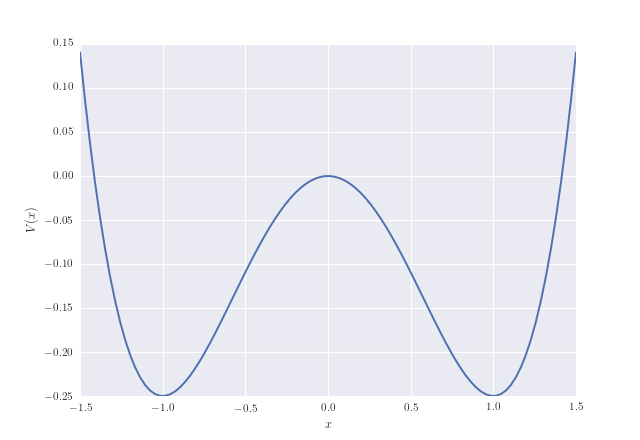

In [4]:
plt.plot(xgrid, Vgrid)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')

In [5]:
def deriv(X, t):
    """Return the derivatives dx/dt and d2x/dt2."""
    
    x, xdot = X
    xdotdot = -dVdx(x)
    return xdot, xdotdot

def solve(tmax, dt, x0, v0):
    """Solve the equation of motion for a quartic oscillator.
    
    Find the numerical solution to the quartic oscillator equation
    of state using a suitable time grid: tmax is the maximum time
    to integrate to; dt is the sampling interval.
    x0, v0 are the initial position and velocity.
    
    Returns the time grid, t, and position, x, and velocity,
    xdot, packed into the n x 2 array X.
    
    """
    
    # The time grid
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t)
    return t, X

In [6]:
# Set up the motion for a oscillator with initial position
# x0 and initially at rest. The potential is symmetric about
# x=0, so it's reasonable to insist that the user sets x0 > 0.
x0, v0 = 1.42, 0

# Total energy. If this is negative, the system never
# gets over the central barrier
E = V(x0)
print('E = {:.2f}'.format(E))

# This is the function we need to integrate to find the period.
def f(x):
    return 1/np.sqrt(E - V(x))

if E > 0:
    # The particle makes it over the barrier.
    A = x0
    # Get the period of the motion by numerical integration.
    T = 4 / np.sqrt(2) * quad(f, 0, A)[0]
else:
    # The particle oscillates inside the righthand well:
    # find the other turning point and integrate to get the
    # period.
    if x0 < 1:
        x1 = brentq(lambda x: E-V(x), 1, 1.5)
    else:
        # Don't forget to make sure x0 < x1.
        x0, x1 = brentq(lambda x: E-V(x), 0, 1), x0
    T = np.sqrt(2) * quad(f, x0, x1)[0]
    
print('Period, T = {:.2f} s'.format(T))

# Maximum time to integrate to, time step.
tmax, dt = 3*T, T/1000

E = 0.01
Period, T = 15.08 s


In [7]:
# Solve the equation of motion.
t, X = solve(tmax, dt, x0, v0)
x, xdot = X.T

In [8]:
# Check the period and from the integrated ODE.
dx, dxdot = x-x0, xdot-v0
pstep = np.argmin(np.hypot(dx, dxdot)[1:]) + 1
print('Period, T = {:.2f} s'.format(t[pstep]))

Period, T = 15.08 s


<IPython.core.display.Javascript object>


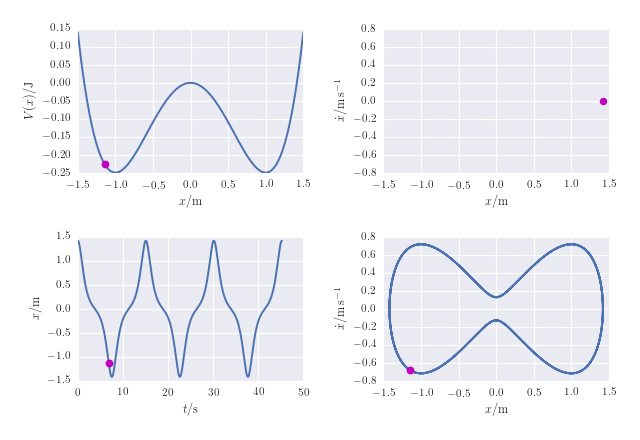

In [9]:
# The animation
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1 = ax[0,0]
ax1.plot(xgrid, Vgrid)
ln1, = ax1.plot([], [], 'mo')
ax1.set_xlabel(r'$x / \mathrm{m}$')
ax1.set_ylabel(r'$V(x) / \mathrm{J}$')

# Position as a function of time
ax2 = ax[1,0]
ax2.plot(t,x)
ax2.set_xlabel(r'$t / \mathrm{s}$')
ax2.set_ylabel(r'$x / \mathrm{m}$')
ln2, = ax2.plot([], [], 'mo')

# Phase space plot
ax3 = ax[1,1]
ax3.plot(x, xdot)
ax3.set_xlabel(r'$x / \mathrm{m}$')
ax3.set_ylabel(r'$\dot{x} / \mathrm{m\,s^{-1}}$')
ln3, = ax3.plot([], [], 'mo')

# Poincaré section plot
ax4 = ax[0,1]
ax4.set_xlabel(r'$x / \mathrm{m}$')
ax4.set_ylabel(r'$\dot{x} / \mathrm{m\,s^{-1}}$')
scat1 = ax4.scatter([x0], [v0], s=45, lw=0, c='m')
# We need to set the x- and y-limits otherwise the animation
# doesn't work.
ax4.set_xlim(ax3.get_xlim())
ax4.set_ylim(ax3.get_ylim())
plt.tight_layout()

def animate(i):
    """Update the image for iteration i of the Matplotlib animation."""
    
    ln1.set_data(x[i], V(x[i]))
    ln2.set_data(t[i], x[i])
    ln3.set_data(x[i], xdot[i])
    if not i % pstep:
        scat1.set_offsets(X[:i+1:pstep])
    return

anim = animation.FuncAnimation(fig, animate, frames=len(x), interval=1)